In [1]:
import sys
import timeit
import pickle
import codecs
import scipy as sp
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from matplotlib import font_manager

%matplotlib inline
#plt.rc('text', usetex = True) # use if latex is installed
plt.rcParams['text.latex.unicode'] = True
plt.rcParams["font.family"] = 'NanumMyeongjo'
plt.rcParams["font.size"] = 20

SMALL_SIZE = 14
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

fm = mpl.font_manager

myeongjo = 'NanumMyeongjo'
gothic = 'NanumGothic'
number = 'DejaVu Sans'

#[(f.name, f.fname) for f in mpl.font_manager.fontManager.ttflist if 'Nanum' in f.name]

In [2]:
mecab = Okt()

# 국산차게시판 데이터는 natCar
# 수입차게시판 데이터는 intCar
# 뉴스 데이터는 news
natCar = list()
intCar = list()
news = list()

with codecs.open('/home/youngwoo/Documents/Media_BigData/figure/korean.txt', 'r', encoding = 'UTF-8') as fs:
  
    data = eval(fs.read())
    
for d in data:
  
    temp = dict()
    temp['time'] = datetime.strptime(d['time'], '%Y.%m.%d')
    temp['title'] = d['title']
    temp['content'] = d['content']
    temp['reply'] = d['reply']
    natCar.append(temp)

with codecs.open('/home/youngwoo/Documents/Media_BigData/figure/international.txt', 'r', encoding = 'UTF-8') as fs:
  
    data = eval(fs.read())
    
for d in data:
  
    temp = dict()
    temp['time'] = datetime.strptime(d['time'], '%Y.%m.%d')
    temp['title'] = d['title']
    temp['content'] = d['content']
    temp['reply'] = d['reply']
    intCar.append(temp)

with open('/home/youngwoo/Documents/Media_BigData/figure/news.pickle', 'rb') as fs:
  
    data = pickle.load(fs)

for d in data:
  
    if d['time'] >= datetime.strptime('2016-01-01', '%Y-%m-%d'):
        
        news.append(d)

In [3]:
df_nat = pd.DataFrame(natCar)
df_nat['len_reply'] = df_nat['reply'].map(len)
df_nat = df_nat[['title', 'content', 'time', 'reply', 'len_reply']]
df_int = pd.DataFrame(intCar)
df_int['len_reply'] = df_int['reply'].map(len)
df_int = df_int[['title', 'content', 'time', 'reply', 'len_reply']]
df_news = pd.DataFrame(news)
df_news = df_news[['title', 'content', 'time']]
df_bmw = df_int.loc[df_int['content'].str.contains('BMW|bmw')]

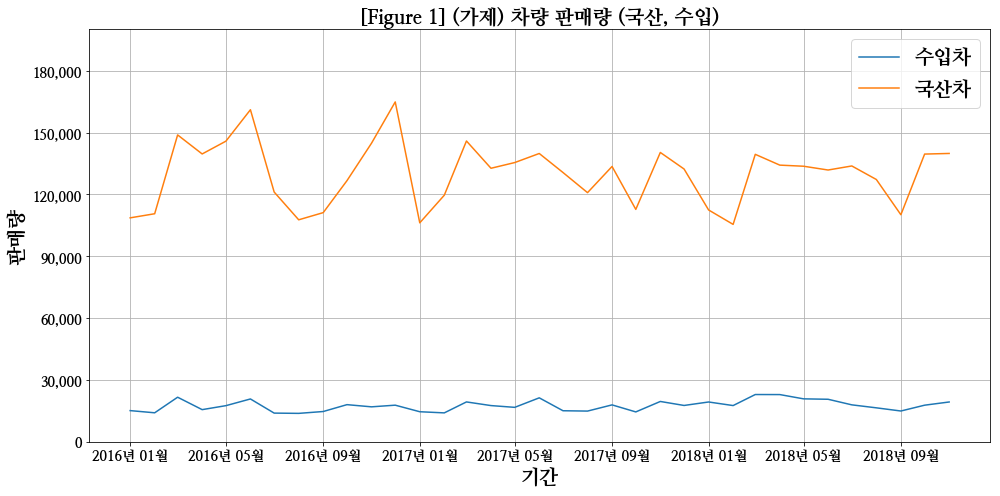

In [4]:
import_car_sales = pd.read_csv('/home/youngwoo/Documents/Media_BigData/figure/auto_import_sales_2016.csv', header=0, index_col=0)
import_car_sales = import_car_sales.transpose()
import_car_sales['imported_total'] = import_car_sales.sum(axis=1)

domestic_car_sales = pd.read_csv('/home/youngwoo/Documents/Media_BigData/figure/auto_domestic_sales.csv', header=0, index_col=0)
domestic_car_sales = domestic_car_sales.transpose()
domestic_car_sales['domestic_total'] = domestic_car_sales.sum(axis=1)

fig, ax = plt.subplots(1, 1, figsize = (14, 7))

ax.plot(pd.to_datetime(import_car_sales.T.keys(), format = '%Y%m'), import_car_sales.imported_total, label = '수입차')
ax.plot(pd.to_datetime(domestic_car_sales.T.keys(), format = '%Y%m'), domestic_car_sales.domestic_total, label = '국산차')

ax.set_title(r'[Figure 1] (가제) 차량 판매량 (국산, 수입)', fontsize = 20, fontname = myeongjo)
ax.set_xlabel('기간', fontsize = 20, fontname = myeongjo)
ax.set_ylabel('판매량', fontsize = 20, fontname = myeongjo)
ax.legend(loc = 'upper right', fontsize = 20)
ax.grid(True)

ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylim(0, 200000)
ax.set_yticks(np.arange(0, 180000 + 1, 30000))

fig.tight_layout()
plt.show()

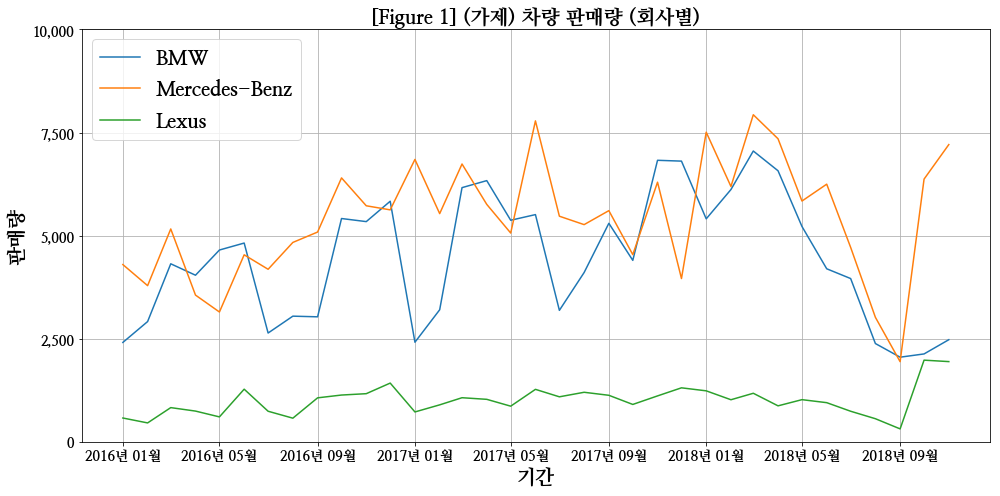

In [5]:
import_car_sales = pd.read_csv('/home/youngwoo/Documents/Media_BigData/figure/auto_import_sales_2016.csv', header=0, index_col=0)
import_car_sales = import_car_sales.transpose()
import_car_sales['imported_total'] = import_car_sales.sum(axis=1)

fig, ax = plt.subplots(1, 1, figsize = (14, 7))

ax.plot(pd.to_datetime(import_car_sales.T.keys(), format = '%Y%m'), import_car_sales['BMW'], label = 'BMW')
ax.plot(pd.to_datetime(import_car_sales.T.keys(), format = '%Y%m'), import_car_sales['Mercedes-Benz'], label = 'Mercedes-Benz')
ax.plot(pd.to_datetime(import_car_sales.T.keys(), format = '%Y%m'), import_car_sales['Lexus'], label = 'Lexus')

ax.set_title(r'[Figure 1] (가제) 차량 판매량 (회사별)', fontsize = 20, fontname = myeongjo)
ax.set_xlabel('기간', fontsize = 20, fontname = myeongjo)
ax.set_ylabel('판매량', fontsize = 20, fontname = myeongjo)
ax.legend(loc = 'upper left', fontsize = 20)
ax.grid(True)

ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylim(0, 10000)
ax.set_yticks(np.arange(0, 10000 + 1, 2500))

fig.tight_layout()
plt.show()

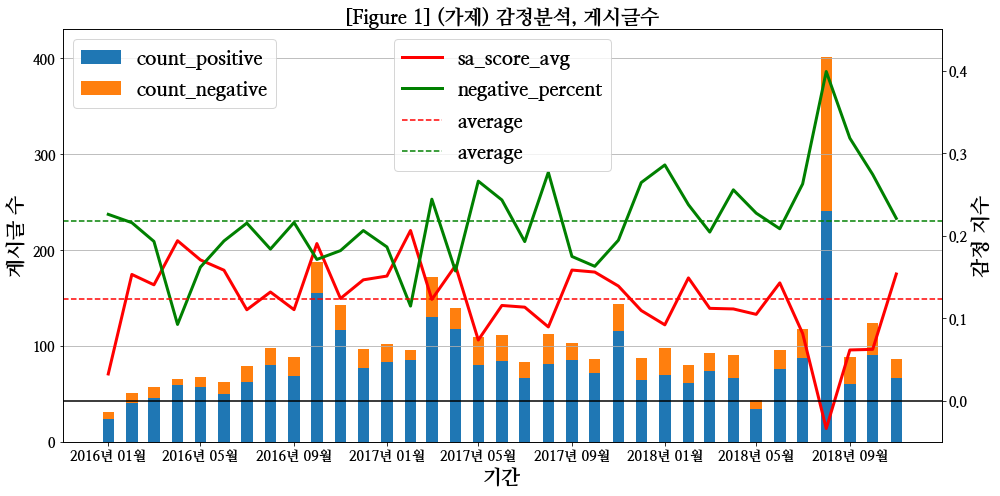

In [6]:
pd_series = pd.read_csv('/home/youngwoo/Documents/Media_BigData/figure/sa_result.csv', header=0, index_col=0)
pd_series = pd_series.transpose()
pd_series['negative_percent'] = pd_series['count_negative'] / pd_series['count']

fig, ax1 = plt.subplots(1, 1, figsize = (14, 7))
ax2 = ax1.twinx()

ax1.bar(pd.to_datetime(pd_series['count_positive'].T.keys(), format = '%Y-%m'),
        pd_series['count_positive'].T.values, label = 'count_positive', width = 15)
ax1.bar(pd.to_datetime(pd_series['count_negative'].T.keys(), format = '%Y-%m'),
        pd_series['count_negative'].T.values, label = 'count_negative',
        bottom =  pd_series['count_positive'].T.values, width = 15)

ax2.plot(pd.to_datetime(pd_series['sa_score_avg'].T.keys(), format = '%Y-%m'),
         pd_series['sa_score_avg'].T.values, label = 'sa_score_avg', c = 'r', lw = 3)
ax2.plot(pd.to_datetime(pd_series['negative_percent'].T.keys(), format = '%Y-%m'),
         pd_series['negative_percent'].T.values, label = 'negative_percent', c = 'g', lw = 3)

ax2.set_xlim(ax2.get_xlim())
ax2.plot(ax2.get_xlim(), [pd_series['sa_score_avg'].T.mean(), pd_series['sa_score_avg'].T.mean()],
         c = 'r', linestyle = '--', label = 'average')
ax2.plot(ax2.get_xlim(), [pd_series['negative_percent'].T.mean(), pd_series['negative_percent'].T.mean()],
         c = 'g', linestyle = '--', label = 'average')
ax2.plot(ax2.get_xlim(), [0, 0], c = 'k', linestyle = '-')

ax1.set_title(r'[Figure 1] (가제) 감정분석, 게시글수', fontsize = 20, fontname = myeongjo)
ax1.set_xlabel('기간', fontsize = 20, fontname = myeongjo)
ax1.set_ylabel('게시글 수', fontsize = 20, fontname = myeongjo)
ax1.legend(loc = 'upper left', fontsize = 20)

ax2.set_ylabel('감정 지수', fontsize = 20, fontname = myeongjo)
ax2.legend(loc = 'upper center', fontsize = 20)

ax1.grid(axis = 'y')

ax1.get_xaxis().set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
ax1.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.set_ylim(0, 430)
ax1.set_yticks(np.arange(0, 450 + 1, 100))

ax2.set_ylim(-0.05, 0.45)

fig.tight_layout()
plt.show()

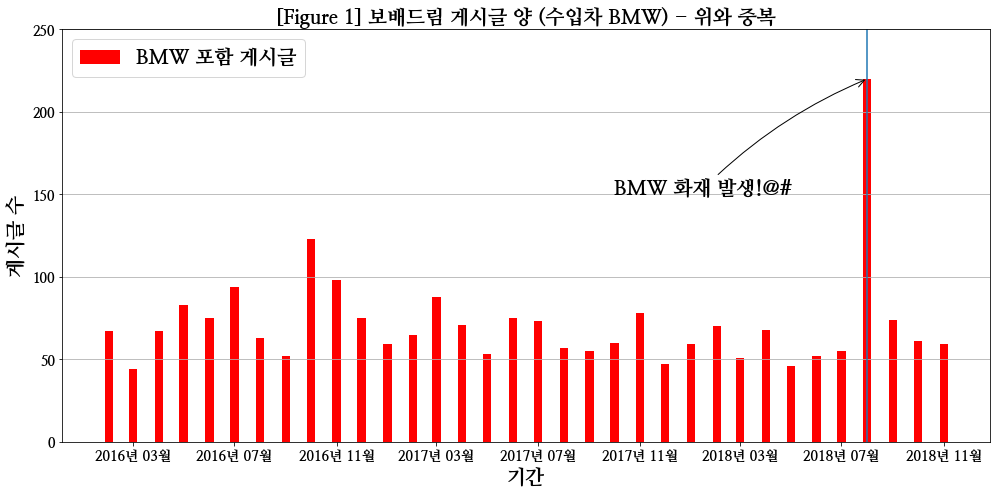

In [7]:
x_nat_year = df_nat['title'].groupby([df_nat["time"].dt.year.rename('year'),
                                  df_nat["time"].dt.month.rename('month')]).count().T[1:].index.get_level_values(level = 0)
x_nat_month = df_nat['title'].groupby([df_nat["time"].dt.year.rename('year'),
                                   df_nat["time"].dt.month.rename('month')]).count().T[1:].index.get_level_values(level = 1)
x_nat_date = pd.DataFrame(x_nat_year, x_nat_month)
x_nat_date['date'] = pd.to_datetime(x_nat_date['year'].astype(int).astype(str) + '-' + x_nat_date.index.astype(int).astype(str))
y_nat = df_nat['title'].groupby([df_nat["time"].dt.year.rename('year'), df_nat["time"].dt.month.rename('month')]).count().T[1:].values

x_int_year = df_int['title'].groupby([df_int["time"].dt.year.rename('year'),
                                  df_int["time"].dt.month.rename('month')]).count().T[18:].index.get_level_values(level = 0)
x_int_month = df_nat['title'].groupby([df_int["time"].dt.year.rename('year'),
                                   df_int["time"].dt.month.rename('month')]).count().T[18:].index.get_level_values(level = 1)
x_int_date = pd.DataFrame(x_int_year, x_int_month)
x_int_date['date'] = pd.to_datetime(x_int_date['year'].astype(int).astype(str) + '-' + x_int_date.index.astype(int).astype(str))
y_int = df_int['title'].groupby([df_int["time"].dt.year.rename('year'), df_int["time"].dt.month.rename('month')]).count().T[18:].values

x_bmw_year = df_bmw['title'].groupby([df_bmw["time"].dt.year.rename('year'),
                                  df_bmw["time"].dt.month.rename('month')]).count().T[1:].index.get_level_values(level = 0)
x_bmw_month = df_bmw['title'].groupby([df_bmw["time"].dt.year.rename('year'),
                                   df_bmw["time"].dt.month.rename('month')]).count().T[1:].index.get_level_values(level = 1)
x_bmw_date = pd.DataFrame(x_bmw_year, x_bmw_month)
x_bmw_date['date'] = pd.to_datetime(x_bmw_date['year'].astype(int).astype(str) + '-' + x_bmw_date.index.astype(int).astype(str))
y_bmw = df_bmw['title'].groupby([df_bmw["time"].dt.year.rename('year'), df_bmw["time"].dt.month.rename('month')]).count().T[1:].values

y_bmw_ratio = y_bmw[17:] / y_int * 100

fig, ax1 = plt.subplots(1, 1, figsize = (14, 7))
#ax2 = ax1.twinx()

ax1.bar(x_bmw_date['date'].values, y_bmw, label = 'BMW 포함 게시글', width = 10, color = 'r')
ax1.axvline(x = mdates.date2num(x_bmw_date['date'].values)[-4])

ax1.annotate(r'BMW 화재 발생!@#',
            xy = (mdates.date2num(x_bmw_date['date'].values[-4]), y_bmw[-4]), xycoords = 'data',
            xytext = (mdates.date2num(x_bmw_date['date'].values[-14]), 150), fontsize = 20,
            textcoords = 'data', arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = -0.1'))


# 비율을 따로 그리면 그리 효과적이진 않음
#ax2.bar(x_bmw_date['date'].values[17:], y_bmw_ratio, width = 15)


ax1.set_title(r'[Figure 1] 보배드림 게시글 양 (수입차 BMW) - 위와 중복', fontsize = 20, fontname = myeongjo)
ax1.set_xlabel('기간', fontsize = 20, fontname = myeongjo)
ax1.set_ylabel('게시글 수', fontsize = 20, fontname = myeongjo)
ax1.legend(loc = 'upper left', fontsize = 20)
ax1.grid(axis = 'y')

ax1.get_xaxis().set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
ax1.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.set_ylim(0, 250)
ax1.set_yticks(np.arange(0, 250 + 1, 50))

#ax2.set_ylim(0, 10)
#ax1.set_yticks(np.arange(0, 250 + 1, 50))

fig.tight_layout()
plt.show()

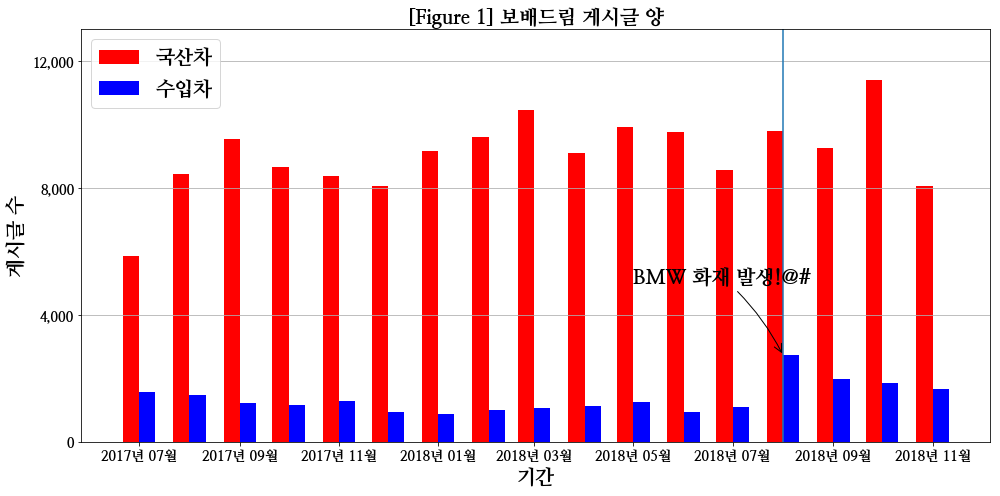

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (14, 7))

ax.plot(x_nat_date['date'].values, y_nat, lw = 0, color = 'r')
ax.bar(mdates.date2num(x_nat_date['date'].values) - 5, y_nat, label = '국산차', width = 10, lw = 3, color = 'r')
ax.bar(mdates.date2num(x_int_date['date'].values) + 5, y_int, label = '수입차', width = 10, lw = 3, color = 'b')
ax.axvline(x = mdates.date2num(x_nat_date['date'].values)[-4])

ax.annotate(r'BMW 화재 발생!@#',
            xy = (mdates.date2num(x_int_date['date'].values[-4]), y_int[-4]), xycoords = 'data',
            xytext = (mdates.date2num(x_int_date['date'].values[-7]), 5000), fontsize = 20,
            textcoords = 'data', arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = -0.1'))


ax.set_title(r'[Figure 1] 보배드림 게시글 양', fontsize = 20, fontname = myeongjo)
ax.set_xlabel('기간', fontsize = 20, fontname = myeongjo)
ax.set_ylabel('게시글 수', fontsize = 20, fontname = myeongjo)
ax.legend(loc = 'upper left', fontsize = 20)
ax.grid(axis = 'y')

ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylim(0, 13000)
ax.set_yticks(np.arange(0, 13000 + 1, 4000))

fig.tight_layout()
plt.show()

In [9]:
y_int = df_int['title'].groupby([df_int["time"].dt.year.rename('year'), df_int["time"].dt.month.rename('month')]).count().T[18:].values

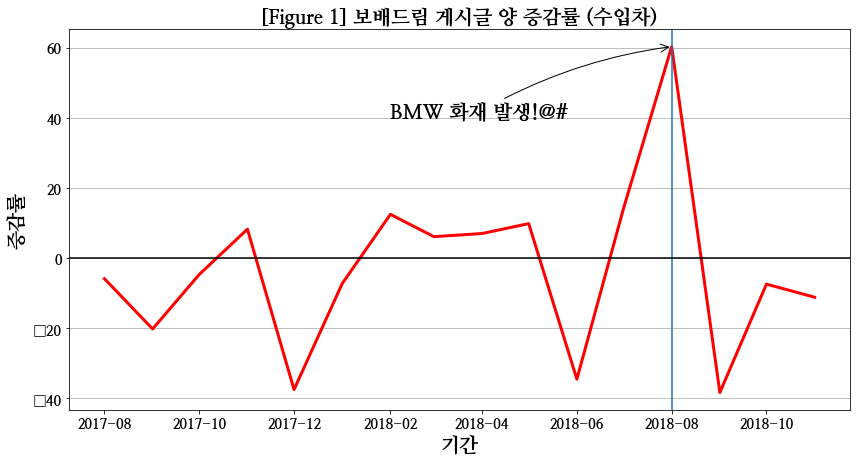

In [12]:
(y_int[1:] - y_int[:-1]) / y_int[1:] * 100


fig, ax = plt.subplots(1, 1, figsize = (14, 7))

ax.plot(x_nat_date['date'].values[1:], (y_int[1:] - y_int[:-1]) / y_int[1:] * 100, label = '국산차', lw = 3, color = 'r')
ax.axvline(x = mdates.date2num(x_nat_date['date'].values)[-4])
ax.axhline(y = 0, color = 'k')

ax.set_title(r'[Figure 1] 보배드림 게시글 양 증감률 (수입차)', fontsize = 20, fontname = myeongjo)
ax.set_xlabel('기간', fontsize = 20, fontname = myeongjo)
ax.set_ylabel('증감률', fontsize = 20, fontname = myeongjo)

ax.annotate(r'BMW 화재 발생!@#',
            xy = (mdates.date2num(x_int_date['date'].values[-4]), ((y_int[1:] - y_int[:-1]) / y_int[1:] * 100)[-4]), xycoords = 'data',
            xytext = (mdates.date2num(x_int_date['date'].values[-10]), 40), fontsize = 20,
            textcoords = 'data', arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = -0.1'))

ax.grid(axis = 'y')

